In [13]:
import pandas as pd
df = pd.read_csv('Lap_Time.csv')

In [14]:
df.tail(10)

,lapId,raceId,driverId,no_lap,position,time_secs,milliseconds,circuitID,Year
15086,418514,980,825,35,17,124.49,124486,13,2017
15087,418515,980,825,36,17,109.13,109126,13,2017
15088,418516,980,825,37,17,109.25,109253,13,2017
15089,418517,980,825,38,17,110.10,110101,13,2017
15090,418518,980,825,39,17,110.38,110383,13,2017
15091,418519,980,825,40,17,110.33,110327,13,2017
15092,418520,980,825,41,17,110.20,110202,13,2017
15093,418521,980,825,42,16,110.44,110441,13,2017
15094,418522,980,825,43,16,111.02,111017,13,2017
15095,418523,980,825,44,15,110.57,110565,13,2017


In [15]:
df.isna().sum()

lapId           0
raceId          0
driverId        0
no_lap          0
position        0
time_secs       0
milliseconds    0
circuitID       0
Year            0
dtype: int64

In [27]:
X = df[['circuitID', 'Year']]

In [28]:
y = df['time_secs']
y = df['time_secs'].values.reshape(-1, 1)

In [29]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=11)


In [30]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (11322, 2)
Shape of testing  set = (3774, 2)


In [32]:
#training
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(f'regression coefficient (slope) = {linear_regression.coef_}')
print(f'                     intercept = {linear_regression.intercept_}')

regression coefficient (slope) = [[ 0.         -0.15737009]]
                     intercept = [437.97774313]


In [34]:
y_pred = linear_regression.predict(X_test)


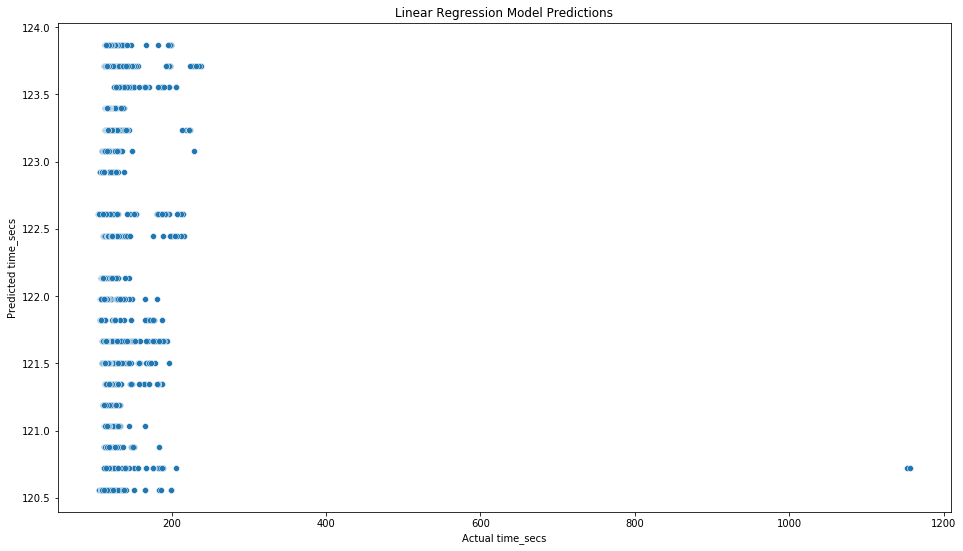

In [35]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), palette='cool')
plt.xlabel('Actual time_secs')
plt.ylabel('Predicted time_secs')
plt.title('Linear Regression Model Predictions')
plt.show()

In [57]:
#predicting
Year = 2023
circuitID = 13
X_new = [[circuitID, Year]]
time_lap_predict = linear_regression.predict(X_new)[0]

print(f'The estimated time_secs for circuit {circuitID} in {Year} is {time_lap_predict[0]:.2f}')


The estimated time_secs for circuit 13 in 2023 is 119.62


In [59]:
#predicting
Year = 2030
circuitID = 13
X_new = [[circuitID, Year]]
time_lap_predict = linear_regression.predict(X_new)[0]

print(f'The estimated time_secs for circuit {circuitID} in {Year} is {time_lap_predict[0]:.2f}')


The estimated time_secs for circuit 13 in 2030 is 118.52


 we see that after applying linear regression over the years the time in seconds reduces for a particular circuitID 

which also resembles to the normal theoritical concept as the tech domain expands the mobility power increases and thereby reduces the time 